# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

In [1]:
import torch
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Git Exercise
In this exercise you will also experience working with github.

You might need to install local python enviroment.
Installation Instruction for ex2 - working on a local python environment:
https://docs.google.com/document/d/1G0rBo36ff_9JzKy0EkCalK4m_ThNUuJ2bRz463EHK9I

## please add the github link of your work below:


example: https://github.com/username/exercise_name

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [2]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

class Ols(object):
  def __init__(self):
    self.w = None
    
  @staticmethod
  def pad(X):
    return np.pad(X, ((0,0),(1,0)), constant_values=1)
  
  def fit(self, X, Y):
    return self._fit(X, Y)
  
  def _fit(self, X, Y):
    X = Ols.pad(X)
    covariance = np.dot(X.T, X)
    correlation = np.dot(X.T, Y)
    weights = np.dot(np.linalg.pinv(covariance), correlation)
    self.w = weights
  
  def predict(self, X):
    #return wx
    return self._predict(X)
  
  def _predict(self, X):
    # optional to use this
    # we use padding inside the _predict otherwise we will normalize the bias padding 
    X = Ols.pad(X)
    return np.dot(X, self.w)
    
  def score(self, X, Y):
    predicted_labels = self.predict(X)
    if isinstance(predicted_labels,torch.Tensor):
      predicted_labels = predicted_labels.detach().numpy()

    return mean_squared_error(Y, predicted_labels)


In [3]:



boston_X, boston_y = load_boston(return_X_y=True)

number_sample = boston_X.shape[0]
number_features = boston_X.shape[1]

print(f"Number of samples {number_sample}")
print(f"Number of features {number_features}")


Number of samples 506
Number of features 13


In [4]:
# split to train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.25, random_state=42)

In [5]:
# train / test MSE
ols_model = Ols()
ols_model.fit(X_train, y_train)
train_score = ols_model.score(X_train, y_train)
test_score =  ols_model.score(X_test, y_test)
train_predictions = ols_model.predict(X_train)
test_predictions = ols_model.predict(X_test)
print(f"OLS train score {train_score}")
print(f"OLS test score {test_score}")

OLS train score 22.340057992152875
OLS test score 22.09869482700952


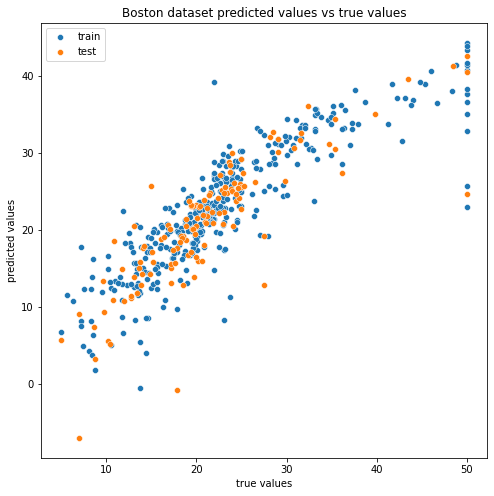

In [6]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_train, y=train_predictions)
sns.scatterplot(x=y_test, y=test_predictions)
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Boston dataset predicted values vs true values");
plt.legend(["train", "test"]);

In [7]:


ss = ShuffleSplit(n_splits=20, test_size=.25, random_state=42)
mse_scores_train = []
mse_scores_test = []

for i, (train_index, test_index) in enumerate(ss.split(boston_X)):
  train_x, train_y = boston_X[train_index], boston_y[train_index]
  test_x, test_y =  boston_X[test_index], boston_y[test_index]
  ols_model = Ols()
  ols_model.fit(train_x, train_y)
  train_score = ols_model.score(train_x, train_y)
  test_score = ols_model.score(test_x, test_y)
  mse_scores_train.append(train_score)
  mse_scores_test.append(test_score)


np.mean(mse_scores_train), np.mean(mse_scores_test)

(21.193933513766574, 25.507532313870488)

In [8]:

statistcs, pvalue = stats.ttest_rel(mse_scores_train, mse_scores_test)
statistcs, pvalue

(-2.3227663224059314, 0.03144792965185703)

We can see significant difference between train result and test results. pvalue is small 0.03

Before we choose normalization method, we need to find the distribution of each feature on the data set. 

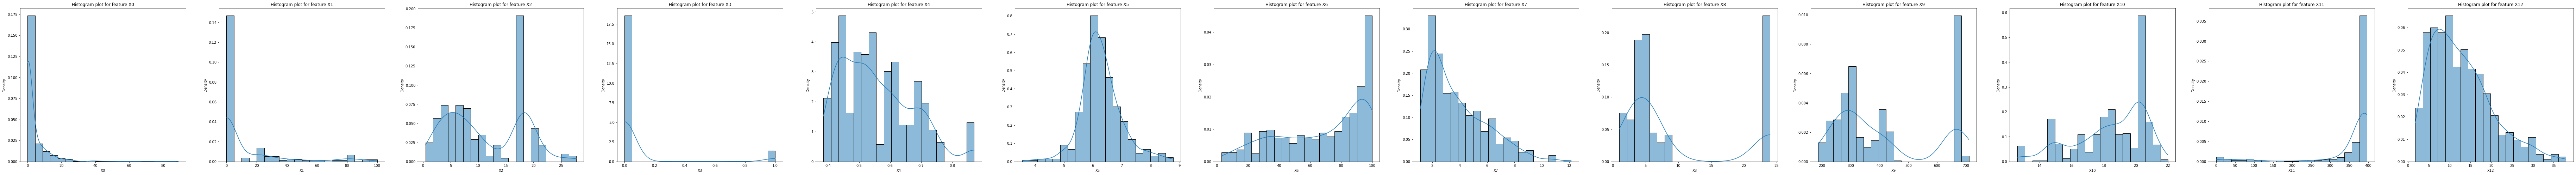

In [9]:

fig,axs = plt.subplots(1,boston_X.shape[1])
fig.set_size_inches(130,8)
for feature in range(boston_X.shape[1]):
  plt.figure(1,figsize=(10,8))
  plt.subplot(1, boston_X.shape[1], feature+1)
  feature_data = boston_X[:, feature]
  sns.histplot(x=feature_data, stat='density', kde=True, bins=20)
  plt.title(f"Histogram plot for feature X{feature}")
  plt.xlabel(f"X{feature}")
  plt.ylabel("Density")

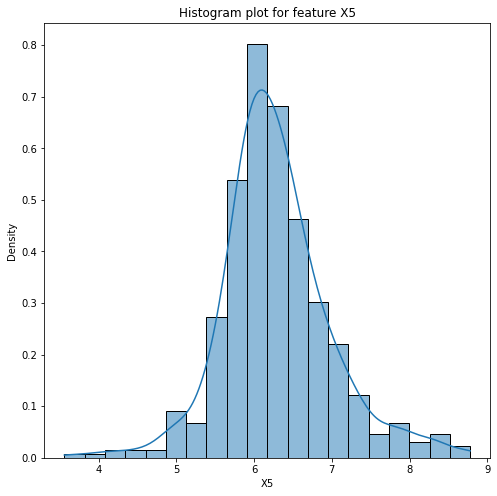

In [10]:
  plt.figure(figsize=(8,8))
  sns.histplot(x= boston_X[:, 5], stat='density', kde=True, bins=20)
  plt.title("Histogram plot for feature X5")
  plt.xlabel("X5")
  plt.ylabel("Density");

We can see that feature X5 (feature number 6) is well fits normal distribution. 

But because we normalize the data inside the model (that is bad coupling), we will use Min-Max normilization to all data.

In [11]:
# Write a new class OlsGd which solves the problem using gradinet descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.

class Normalizer():
  def __init__(self,range=(0,1)):
    self.data_min = None
    self.data_max = None
    self.range=range

  def fit(self, X):
    self.data_min = np.min(X,axis=0)
    self.data_max = np.max(X,axis=0)
    return self.predict(X)

  def predict(self, X):
    #apply normalization
    # because we don't get params to the
    return (X - self.data_min) / (self.data_max - self.data_min) * (self.range[1] - self.range[0])

    
class OlsGd(Ols):
  
  def __init__(self, learning_rate=.05, 
               num_iteration=1000, 
               normalize=True,
               early_stop=True,
               verbose=True):
    
    super(OlsGd, self).__init__()
    self.learning_rate = learning_rate
    self.num_iteration = num_iteration
    self.early_stop = early_stop
    self.normalize = normalize
    self.normalizer = Normalizer()    
    self.verbose = verbose
    self.loss_history = None
    
  def _fit(self, X, Y, reset=True,track_loss=True):
    #remeber to normalize the data before starting
    if self.normalize:
      X = self.normalizer.fit(X)
    X = OlsGd.pad(X)

    X = torch.from_numpy(X.astype(np.float32))
    Y = torch.from_numpy(Y.astype(np.float32))
    self.w = torch.randn(X.shape[1], 1, requires_grad=True)
    epochs_loss = []
    for epoch in range(self.num_iteration):

      step_loss = self._step(X,Y)
      epochs_loss.append(step_loss)
      if self.verbose:
        print(f"Epoch {epoch}: loss = {epochs_loss[epoch]}")

      if self.early_stop and epoch >=2:
        if abs(epochs_loss[epoch-1] - epochs_loss[epoch]) <= 1e-5:
          if self.verbose:
            print(f"Early stopping condition met, number of iteration {epoch}")
          break
    
    if track_loss:
      self.loss_history = epochs_loss

        
  def _predict(self, X):
    if self.normalize:
      X = self.normalizer.predict(X)
    X = OlsGd.pad(X)
    X = torch.from_numpy(X.astype(np.float32))
    return torch.mm(X, self.w).flatten()

      
  def _step(self, X, Y):
    # use w update for gradient descent
    y_pred = torch.mm(X, self.w).flatten()

    loss = torch.square(y_pred - Y).mean()
    loss.backward()
    
    with torch.no_grad():
        self.w.sub_(self.learning_rate * self.w.grad)
    self.w.grad.zero_()
    return loss.item()
    

In [12]:
torch.manual_seed(42)
olsgd = OlsGd(num_iteration=100000,learning_rate=0.01, verbose=False)
olsgd.fit(X_train, y_train)
train_score = olsgd.score(X_train, y_train)
test_score = olsgd.score(X_test, y_test)


print(f"OlsGd train score: {train_score}")
print(f"OlsGd test score: {test_score}")

OlsGd train score: 22.429018838889096
OlsGd test score: 22.591033134411997


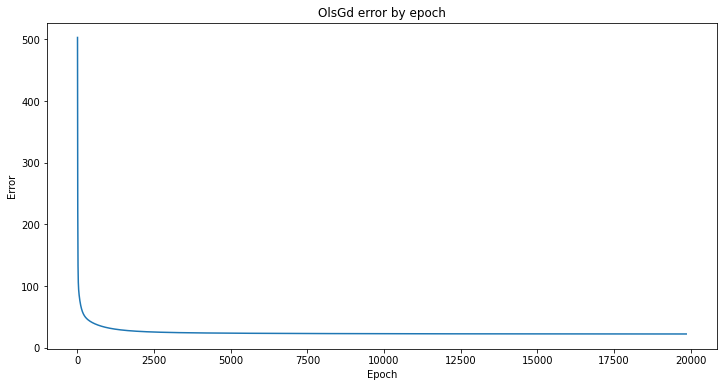

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(y=olsgd.loss_history, x=np.arange(1,len(olsgd.loss_history)+1))
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("OlsGd error by epoch");

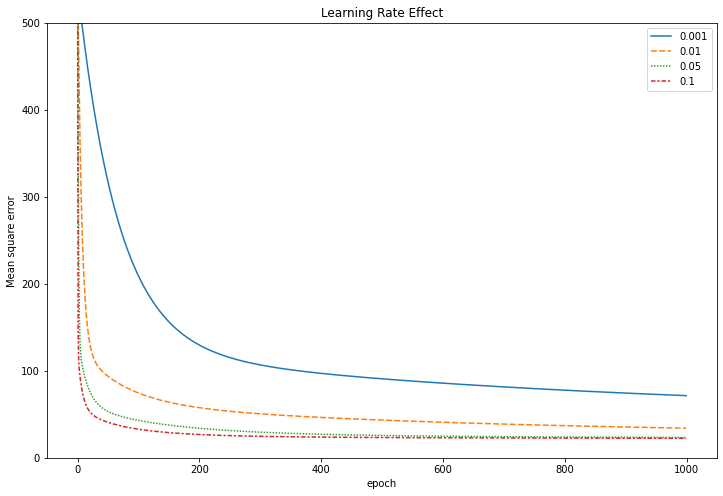

In [14]:
# What is the effect of learning rate? 
learning_rates = [0.001, 0.01, 0.05, 0.1]
lr_results = {}
for lr in learning_rates:
  olsgd = OlsGd(num_iteration=1000,learning_rate=lr,verbose=False, early_stop=False)
  olsgd.fit(boston_X, boston_y)
  lr_results[lr] = olsgd.loss_history

lr_results = pd.DataFrame(lr_results)

plt.figure(figsize=(12,8))

sns.lineplot(data=lr_results)
plt.title("Learning Rate Effect")
plt.ylabel("Mean square error")
plt.xlabel("epoch")
plt.ylim(0,500)
plt.legend();

**What is the effect of learning rate? How would you find number of iteration automatically?**

We can check how much the model is improves between each iteration, if the model improvment is less than defines threshold we stop the training.
This is better solution than using fix number of iterations because when we reduce the learning rate, we may need more iterations to converge. Whem we use high learning rate we may converge fater than the num of iterations, and it's waste of computational resources.
We can see from the plot that for learning rate 0.001, the model didn't converge in 1000 iterations, in addition for learning rate 0.1, the model converge much faster than 1000 iterations.

## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



**ANALYTICAL SOLUTION**

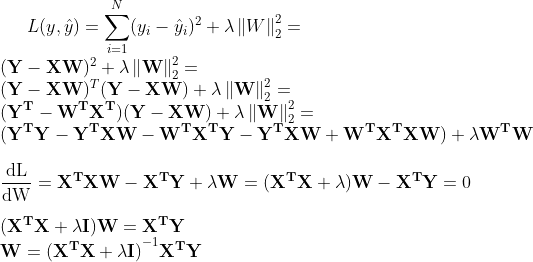

In [15]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda

  def _fit(self, X, Y):
      X = RidgeLs.pad(X)
      covariance = np.dot(X.T, X) + np.identity(X.shape[1]) * self.ridge_lambda
      correlation = np.dot(X.T, Y)
      weights = np.dot(np.linalg.pinv(covariance), correlation)
      self.w = weights


In [16]:
ridgels = RidgeLs(ridge_lambda=1e-2)
ridgels.fit(X_train, y_train)
train_score = ridgels.score(X_train, y_train)
test_score = ridgels.score(X_test, y_test)

print(f"RidgeLs train score: {train_score}")
print(f"RidgeLs test score: {test_score}")

RidgeLs train score: 22.340594121333567
RidgeLs test score: 22.143438713581475


### Use scikitlearn implementation for OLS, Ridge and Lasso

In [17]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.25, random_state=42)

def model_evaluation(model, train_x, test_x, train_y, test_y):
  model.fit(train_x, train_y)
  model_train_prediction = model.predict(train_x)
  model_train_mse = mean_squared_error(train_y, model_train_prediction)
  model_test_prediction = model.predict(test_x)
  model_test_mse = mean_squared_error(test_y, model_test_prediction)
  return model_train_mse, model_test_mse


In [18]:
linear_regression = LinearRegression()
train_mse, test_mse = model_evaluation(linear_regression, X_train, X_test, y_train, y_test)

print(f"LinearRegression Train MSE: {train_mse}")
print(f"LinearRegression Test MSE: {test_mse}")

LinearRegression Train MSE: 22.340057992152875
LinearRegression Test MSE: 22.098694827098424


In [19]:
# Lasso
lasso = Lasso()
train_mse, test_mse = model_evaluation(lasso, X_train, X_test, y_train, y_test)

print(f"Lasso Train MSE: {train_mse}")
print(f"Lasso Test MSE: {test_mse}")

Lasso Train MSE: 27.06530314480457
Lasso Test MSE: 24.39075259035517


In [20]:
# Ridge
ridge = Ridge()
train_mse, test_mse = model_evaluation(ridge, X_train, X_test, y_train, y_test)

print(f"Ridge Train MSE: {train_mse}")
print(f"Ridge Test MSE: {test_mse}")

Ridge Train MSE: 22.514856874792688
Ridge Test MSE: 22.480475501233876
